# Naive Bayes homework with Yelp review text

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv in your data directory and load it into a DataFrame
import pandas as pd
path = '/Users/arthurkolios/documents/data_science/GA-SEA-DAT1/data/'
yelp = pd.read_csv(path + 'yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 2

Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [2]:
# filter the DataFrame to only rows that have a 5-star or 1-star rating. Using an OR condition
yelp51 = yelp[(yelp.stars==1) | (yelp.stars==5)]

## Task 3

Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [3]:
# define X and y
X = yelp51['text']
y = yelp51.stars

In [4]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Task 4

Use CountVectorizer to create document-term matrices from X_train and X_test.

In [5]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [6]:
# fit and transform X_train, but only transform X_test
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
print X_train_dtm

X_test_dtm = vect.transform(X_test)
print X_test_dtm

  (0, 802)	1
  (0, 1410)	1
  (0, 1514)	1
  (0, 1561)	1
  (0, 1654)	1
  (0, 2002)	1
  (0, 2300)	1
  (0, 3651)	1
  (0, 4746)	1
  (0, 5620)	1
  (0, 5976)	1
  (0, 6158)	1
  (0, 6556)	1
  (0, 6675)	1
  (0, 8782)	1
  (0, 8816)	1
  (0, 9740)	1
  (0, 9849)	1
  (0, 10268)	1
  (0, 10339)	1
  (0, 10472)	1
  (0, 10835)	1
  (0, 10939)	1
  (0, 11747)	1
  (0, 13117)	1
  :	:
  (3063, 15220)	3
  (3063, 15225)	1
  (3063, 15449)	1
  (3063, 15518)	1
  (3063, 15696)	1
  (3063, 15822)	1
  (3063, 15823)	1
  (3063, 15881)	1
  (3063, 15894)	1
  (3063, 16107)	2
  (3063, 16146)	2
  (3063, 16152)	1
  (3063, 16260)	1
  (3063, 16264)	1
  (3063, 16308)	1
  (3063, 16327)	1
  (3063, 16401)	1
  (3063, 16440)	1
  (3063, 16460)	1
  (3063, 16489)	1
  (3063, 16547)	1
  (3063, 16578)	1
  (3063, 16648)	1
  (3063, 16672)	7
  (3063, 16680)	4
  (0, 72)	1
  (0, 221)	2
  (0, 789)	1
  (0, 802)	9
  (0, 984)	1
  (0, 985)	1
  (0, 1048)	1
  (0, 1064)	1
  (0, 1155)	1
  (0, 1313)	1
  (0, 1410)	1
  (0, 1519)	1
  (0, 1521)	2
  (0, 1556)	1

## Task 5

Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [7]:
# import/instantiate/fit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [9]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.930528375734


## Task 6

Calculate the AUC.

In [10]:
# y_test contains fives and ones, which will confuse the roc_auc_score function
y_test[:10].values

array([5, 5, 5, 5, 5, 5, 1, 5, 5, 5])

In [11]:
# create y_test_binary, which contains ones and zeros instead
y_test_binary = y_test.map({5:1,1:0})
y_test_binary[:10].values

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [12]:
# predict class probabilities
nb.predict_proba(X_test_dtm)

y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 1.        ,  0.99970444,  1.        , ...,  1.        ,
        0.00812685,  0.99999896])

In [13]:
# calculate the AUC using y_test_binary and y_pred_prob
from sklearn import metrics
print metrics.roc_auc_score(y_test_binary, y_pred_prob)

0.936582864821


## Task 7

Plot the ROC curve.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

[ 0.          0.03636364  0.03636364  0.03636364  0.03636364  0.03636364
  0.04242424  0.04242424  0.04242424  0.04242424  0.04848485  0.04848485
  0.05454545  0.06060606  0.06060606  0.06060606  0.06060606  0.06666667
  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667  0.07272727  0.07272727  0.07272727
  0.07272727  0.07272727  0.07272727  0.07272727  0.07272727  0.07272727
  0.07272727  0.07272727  0.07272727  0.07272727  0.07272727  0.07272727
  0.07272727  0.07272727  0.07272727  0.07272727  0.07272727  0.07878788
  0.07878788  0.07878788  0.07878788  0.07878788  0.07878788  0.07878788
  0.07878788  0.07878788  0.07878788  0.07878788  0.07878788  0.07878788
  0.07878788  0.07878788  0.07878788  0.07878788  0

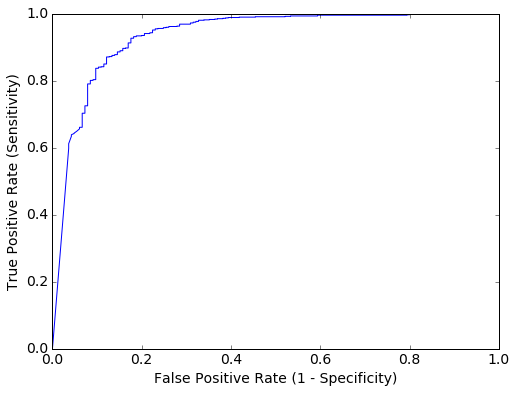

In [15]:
# plot ROC curve using y_test_binary and y_pred_prob
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print fpr
#print(metrics.roc_curve(y_test_binary, y_pred_prob))

## Task 8

Print the confusion matrix, and calculate the sensitivity and specificity. Comment on the results.

In [16]:
# print the confusion matrix
y_test_binary
conf_mat =  metrics.confusion_matrix(y_test_binary, y_pred_class)
print conf_mat


[[  0 109  56]
 [  0  15 842]
 [  0   0   0]]


In [17]:
# calculate sensitivity - True positive rate
sum1 = conf_mat[1].sum()
print sum1
tp = conf_mat[1][2]
print tp
sensitivity = tp/(sum1*1.0)
print sensitivity

857
842
0.982497082847


In [18]:
# calculate specificity (1 - False Positive Rate)
sum2 = conf_mat[0].sum()
fp = conf_mat[0][2]
fpr2 = fp/(sum2*1.0)
specificity = 1-fpr2
print specificity

0.660606060606


The model is having a much easier time detecting five-star reviews than one-star reviews.

## Task 9

Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [19]:
# print message text for the false positives
pd.set_option('display.max_seq_items', 100)
print X_test[y_test < y_pred_class]

5977    You want good food? You'd be better off smuggl...
140     Other than the really great happy hour prices,...
1372    No offense to everyone who gave this place 5 s...
4630    I used to always go here for tires until my me...
7513    Closed on Sunday?  Looks like you've not only ...
8626                       sslowest drive through ever!!!
8943    Went to Sol for restaurant week.  Was less tha...
507     HELLISH HELLISH SUMMER WEATHER (March thru Oct...
8514                                      Out of business
2297    This is a sad excuse for a gay resort.  Sort o...
1187    Needs a new name - now.  \n\nThe Pischke's of ...
3238    Soggy flavorless pizza served on unwarmed cera...
7739    So, there's no negative stars, too bad. Tried ...
4686                UPDATE: This location is closed. Boo!
8532    The bill was 150.00 and that was after a free ...
7035    Totally excited to try this place out, my gran...
6921    I never knew green chilies were more valuable ...
1878    I went

I think that words like "crave", "cool", "good", "enjoy", "rave" and "OMG" were associated in the training model with good reviews.

In [20]:
# print message text for the false negatives
X_test[y_test > y_pred_class]

6376       They have a mechanical bull.  Need I say more?
9622    I always buy my tires at Walmart, but they did...
750     This store has the most pleasant employees of ...
3052    When I met some friends for dinner at this res...
4034    "Fine dining" is not just a setting.  it isn't...
1323    I just wanted to add that in addition to party...
5332    I had a great experience.  Nice people.   My m...
6779    I had the terrible decision to make to euthani...
9636    OK OK... as a Proud Italian I hope my momma do...
6334    I came here today for a manicure and pedicure....
7531    This was such a good experience\nI was up all ...
8053    My wife called to have our vent cleaned since ...
1404    Excellent customer service, super clean, and t...
2626    I highly reccomend this place. They helped my ...
7148    I now consider myself an Arizonian. If you dri...
Name: text, dtype: object

For the false negatives, it looks like, in some cases, words like "horribly", "terrible" and "hate" were associated with negative reviews in the training model.

## Task 10

Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?

In [21]:
# create a list that will store the results of the process below
# loop through the thresholds returned by the metrics.roc_curve function
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
#y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
tup = []
for index, values in enumerate(thresholds):
    sens = tpr[index]
    spec = (1-fpr[index])
    diff = sens - spec
    X = [values,(sens-spec)]
    tup.append(X)

tup2 = pd.DataFrame(tup, columns = (['thresholds','diff']))
print tup2.describe()

         thresholds        diff
count  4.290000e+02  429.000000
mean   7.533549e-01    0.111128
std    4.014394e-01    0.319762
min    7.378070e-34   -1.000000
25%    5.990707e-01   -0.144083
50%    9.981564e-01    0.039496
75%    9.999734e-01    0.306269
max    2.000000e+00    1.000000


In [22]:
# locate the minimum difference (at which sensitivity and specificity are balanced)
# pick rows>0
print tup2[tup2['diff']>0]


       thresholds      diff
197  9.992959e-01  0.000085
198  9.992907e-01  0.006145
199  9.992675e-01  0.007312
200  9.992113e-01  0.008479
201  9.991539e-01  0.009646
202  9.990188e-01  0.015707
203  9.989971e-01  0.016874
204  9.989804e-01  0.018040
205  9.989342e-01  0.024101
206  9.989260e-01  0.025268
207  9.989067e-01  0.026435
208  9.988824e-01  0.027602
209  9.987814e-01  0.028768
210  9.986288e-01  0.029935
211  9.985812e-01  0.031102
212  9.984684e-01  0.032269
213  9.984102e-01  0.038330
214  9.981564e-01  0.039496
215  9.980696e-01  0.040663
216  9.979370e-01  0.041830
217  9.979265e-01  0.047891
218  9.976636e-01  0.049058
219  9.975982e-01  0.050225
220  9.975611e-01  0.051391
221  9.975466e-01  0.052558
222  9.975335e-01  0.053725
223  9.975272e-01  0.054892
224  9.974970e-01  0.060953
225  9.974948e-01  0.062119
226  9.973739e-01  0.068180
..            ...       ...
399  7.456037e-05  0.705590
400  6.048523e-05  0.711651
401  5.634746e-05  0.717712
402  4.639998e-05  0

Sensitivity and specificity are balanced with threshold = 9.985983e-01 , with a sensitivity-specificity difference of 0.002253

## Task 11

Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:

- Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)
- Split the data into training and testing sets.
- Calculate the testing accuracy of a Naive Bayes model.
- Compare the testing accuracy with the null accuracy.
- Print the confusion matrix.
- Comment on the results.

In [23]:
# define X and y using the original DataFrame
# define X and y
X = yelp['text']
y = yelp.stars

In [24]:
# split into training and testing sets

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
# create document-term matrices
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# fit and transform X_train, but only transform X_test
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
print X_train_dtm

X_test_dtm = vect.transform(X_test)
print X_test_dtm

  (0, 423)	1
  (0, 474)	1
  (0, 562)	1
  (0, 633)	1
  (0, 743)	1
  (0, 761)	1
  (0, 912)	1
  (0, 990)	1
  (0, 1080)	2
  (0, 1112)	1
  (0, 1145)	1
  (0, 1158)	1
  (0, 1204)	1
  (0, 1254)	3
  (0, 1275)	13
  (0, 1401)	1
  (0, 1461)	2
  (0, 1561)	2
  (0, 1562)	1
  (0, 1697)	1
  (0, 1749)	1
  (0, 1778)	5
  (0, 2386)	1
  (0, 2559)	1
  (0, 2711)	1
  :	:
  (7499, 1275)	2
  (7499, 2386)	1
  (7499, 3368)	1
  (7499, 3887)	1
  (7499, 8520)	1
  (7499, 8983)	1
  (7499, 9299)	1
  (7499, 10236)	1
  (7499, 11625)	3
  (7499, 12156)	1
  (7499, 12622)	1
  (7499, 13537)	1
  (7499, 14574)	1
  (7499, 15060)	1
  (7499, 15097)	1
  (7499, 15323)	1
  (7499, 16488)	1
  (7499, 16677)	1
  (7499, 17630)	1
  (7499, 18751)	1
  (7499, 20402)	1
  (7499, 22943)	1
  (7499, 22987)	1
  (7499, 23208)	3
  (7499, 24461)	2
  (0, 307)	1
  (0, 562)	2
  (0, 874)	1
  (0, 900)	1
  (0, 1150)	1
  (0, 1254)	1
  (0, 1275)	5
  (0, 1387)	1
  (0, 1561)	4
  (0, 1608)	1
  (0, 1698)	1
  (0, 1778)	3
  (0, 1971)	1
  (0, 2185)	9
  (0, 2252)	1
  

In [26]:
# fit a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [28]:
# calculate the testing accuary
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.4912


In [29]:
# calculate the null accuracy
print y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

4    855
5    838
3    384
2    244
1    179
Name: stars, dtype: int64


4    0.342
Name: stars, dtype: float64

In [30]:
# print the confusion matrix
conf_mat=metrics.confusion_matrix(y_test, y_pred_class)
print conf_mat

[[ 58  22  16  65  18]
 [ 16  27  41 140  20]
 [  6   6  33 304  35]
 [  5   1  18 637 194]
 [  6   0   7 352 473]]


In [31]:
 #calculate sensitivity - True positive rate (for 1 star reviews)
sum1 = conf_mat[0].sum()
tp = conf_mat[0][0]
sensitivity = tp/(sum1*1.0)
print 'sensitivity =' + str(sensitivity)


sensitivity =0.324022346369


In [52]:
# calculate specificity (1 - False Positive Rate)
def sumf(l,n): 
    return l[n].sum()
sum2 = 0
for nl in range(1,5):
    sum2 = sum2+sumf(conf_mat,nl)
fp=0
for x in range(1,5):
    fp = fp+ conf_mat[x][0]
print fp
fpr2 = (fp*1.0)/(fp+sum2)
specificity = 1-fpr2
print 'specificity = ' + str(specificity)

33
specificity = 0.985981308411


Comments: This model has a far lower accuracy rate (0.47) than the previous model (0.93). The problems seem to lie on the sensitivity side, with a very low true positive rate of 0.27. It does much better on the specificity side, with a specificity level of 0.985.

